# Maven Central Criticality Analysis
This notebook performs a criticality analysis of Maven Central packages using PageRank, Transitive Dependency Size (TDS), and Freshness metrics.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from criticality_helper import CriticalityHelper
from IPython.display import display, HTML


In [2]:
# Initialize criticality helper and load data
# The large dataset will be automatically downloaded from Zenodo if not present
analyser = CriticalityHelper()
analyser.load_and_preprocess_data(verbose=True)

Loading Maven Central release data...
Main dataset not found locally. Downloading from Zenodo...
This may take several minutes depending on your connection.
Downloading: 100.0%
Download complete: source\parquet\maven_data.parquet
File size: 0.62 GB
Loading cached processed CVE data...
Cached CVE data merged
Dependency data merged into artifact-level DataFrame
Loading auxiliary data for Pfeiffer's work replication...
TF data merged into artifact-level DataFrame


,gav,pagerank,timestamp,pr_core,tds_core,direct_dependents,direct_deps,recent_dependents,recent_dependencies,missed,...,max_severity,cve_critical_count,cve_high_count,cve_moderate_count,cve_low_count,cve_years,has_recent_cve,recent_cve_count,release_timestamp,release_days
0,org.bedework.deploy:bw-wfmodules-calendar-engi...,0.1500,1644782727000,0.1500,797,0,1,0,1,3,...,NONE,0,0,0,0,[],False,0,2022-02-13 20:05:27+00:00,780.264734
1,org.bedework.deploy:bw-wfmodules-calendar-engi...,0.1500,1644719554000,0.1500,797,0,1,0,1,5,...,NONE,0,0,0,0,[],False,0,2022-02-13 02:32:34+00:00,780.995903
2,org.bedework.deploy:bw-wfmodules-calendar-engi...,0.1500,1644730462000,0.1500,797,0,1,0,1,4,...,NONE,0,0,0,0,[],False,0,2022-02-13 05:34:22+00:00,780.869653
3,org.ops4j.pax.exam.samples:pax-exam-sample7-se...,0.1925,1530811120000,0.2775,0,1,0,1,0,6,...,NONE,0,0,0,0,[],False,0,2018-07-05 17:18:40+00:00,1235.149225
4,org.bedework.deploy:bw-wfmodules-calendar-engi...,0.1500,1644812349000,0.1500,797,0,1,0,1,2,...,NONE,0,0,0,0,[],False,0,2022-02-14 04:19:09+00:00,779.921887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13002234,io.github.shuigedeng:taotao-cloud-starter-web:...,0.1500,1633661247000,0.1500,9047,0,44,0,44,35,...,NONE,0,0,0,0,[],False,0,2021-10-08 02:47:27+00:00,1023.384907
13002235,io.github.shuigedeng:taotao-cloud-starter-web:...,0.1500,1680258294000,0.1500,9036,0,44,0,39,16,...,NONE,0,0,0,0,[],False,0,2023-03-31 10:24:54+00:00,484.067234
13002236,io.github.shuigedeng:taotao-cloud-starter-web:...,0.1500,1674876344000,0.1500,9608,0,45,0,41,18,...,NONE,0,0,0,0,[],False,0,2023-01-28 03:25:44+00:00,546.358322
13002237,io.github.shuigedeng:taotao-cloud-starter-web:...,0.1500,1677561650000,0.1500,9769,0,44,0,39,17,...,NONE,0,0,0,0,[],False,0,2023-02-28 05:20:50+00:00,515.278391


Artifact-level TDS processed (cap 99.90%, without recency)
tds_bucket
Moderate             124775
Lightweight          122636
Very Lightweight     121202
Heavy                 88988
Bloated / Complex     57154
No Dependencies       53937
Name: count, dtype: int64


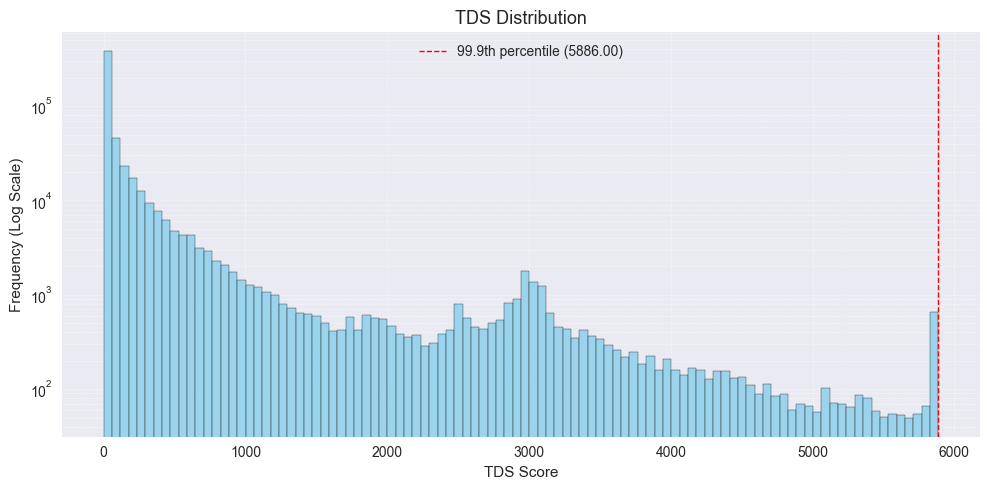

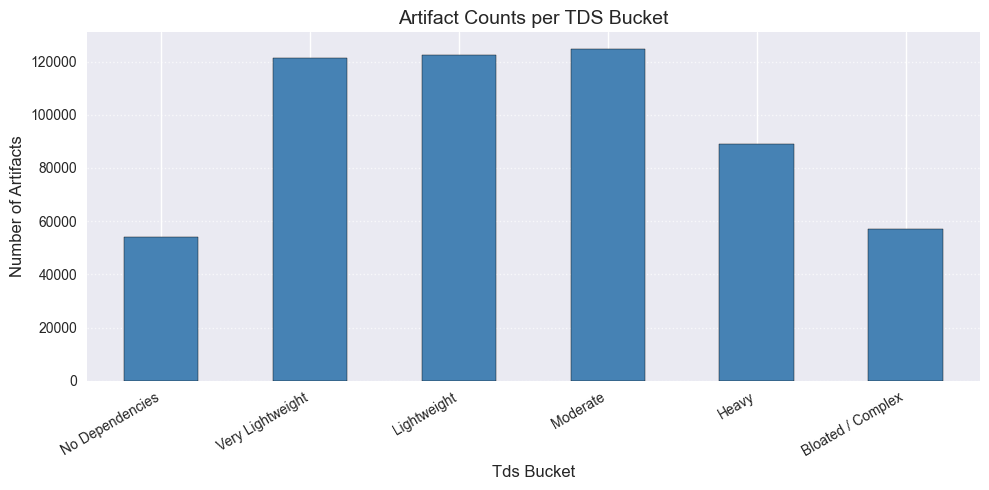

In [3]:
# Calculate TDS Scores and assign buckets
analyser.process_tds_scores()  
analyser.assign_tds_buckets()

#print and describe TDS scores
analyser.df_artifacts['mean_tds'].describe()
print(analyser.df_artifacts["tds_bucket"].value_counts(dropna=False))

#plot and display TDS distribution and bucket counts
fig =analyser.plot_distribution(
    column="mean_tds",
    title="TDS Distribution",
    xlabel="TDS Score",
    source="artifact"
)
fig2 = analyser.plot_bucket_counts(
    bucket_col="tds_bucket",
    title="Artifact Counts per TDS Bucket",
    bucket_order=[
        "No Dependencies",
        "Very Lightweight",
        "Lightweight",
        "Moderate",
        "Heavy",
        "Bloated / Complex"
    ]
)


PageRank processed (log-clipped mode, cap 99.9%, cap_val=22.33)
pr_bucket
None          293681
Peripheral    120096
Notable        85861
Core           58937
Important       8627
Elite           1490
Name: count, dtype: int64


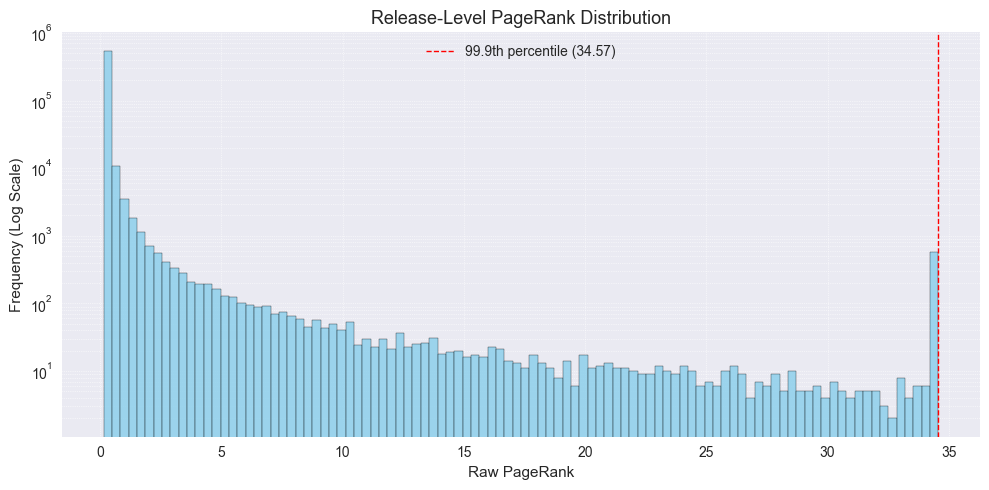

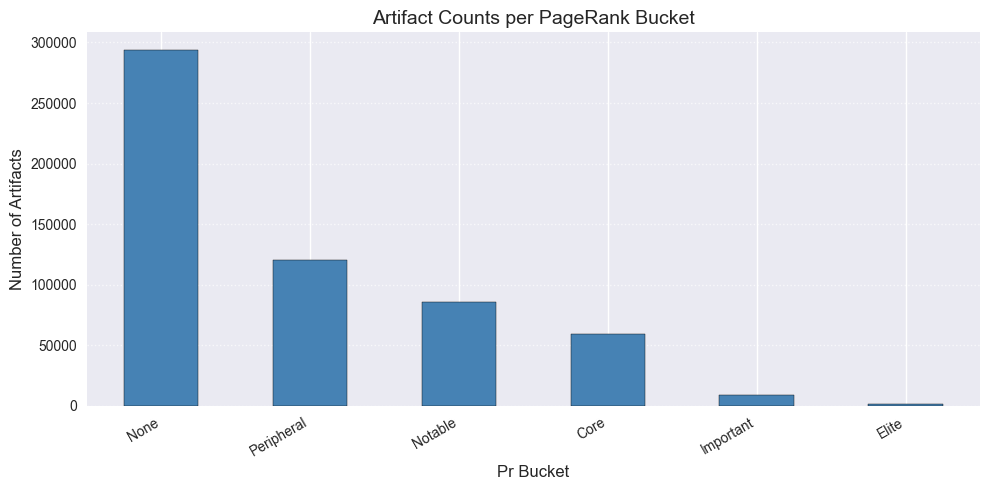

In [4]:
# Calculate PageRank Scores and assign buckets
analyser.process_pagerank_scores() 
analyser.assign_pagerank_buckets()

# Print and describe PageRank scores
print(analyser.df_artifacts["pr_bucket"].value_counts(dropna=False))
analyser.df_artifacts['mean_pagerank'].describe()


# Plot and display PageRank distribution and bucket counts
fig =analyser.plot_distribution(
    column="mean_pagerank",
    source="artifact",
    title="Release-Level PageRank Distribution",
    xlabel="Raw PageRank"
)

fig2 =analyser.plot_bucket_counts(
    bucket_col="pr_bucket",
    title="Artifact Counts per PageRank Bucket",
    bucket_order=["None", "Peripheral", "Notable", "Core","Important", "Elite"]


)

  Freshness computed
half-life τ   : 2.00 years
decay λ       : 0.00095 day⁻¹
missed penalty: 0.20 (artifact/τ norm)
score range   : 0.0004 – 0.9995
mean score    : 0.4763
freshness_bucket
Stale         191652
Fresh         115873
Aging         100972
Freshest       82475
Maintained     77720
Name: count, dtype: int64


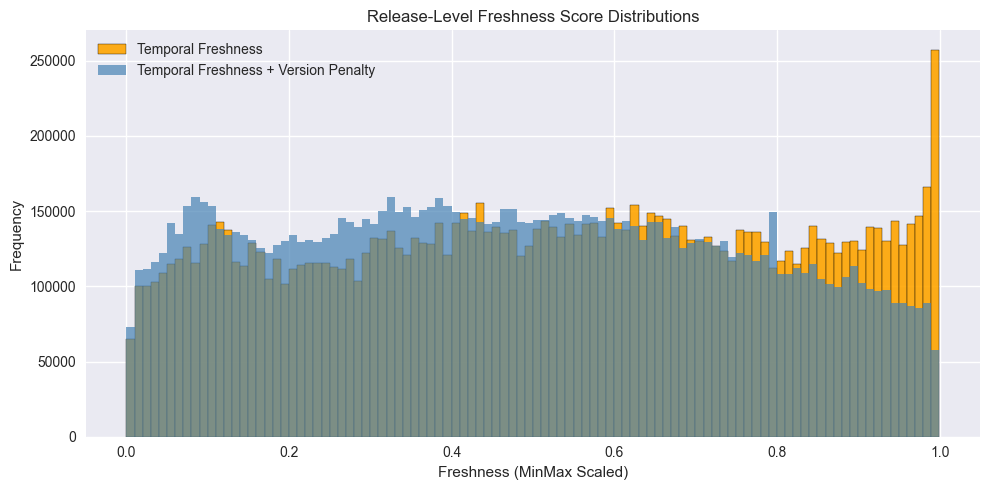

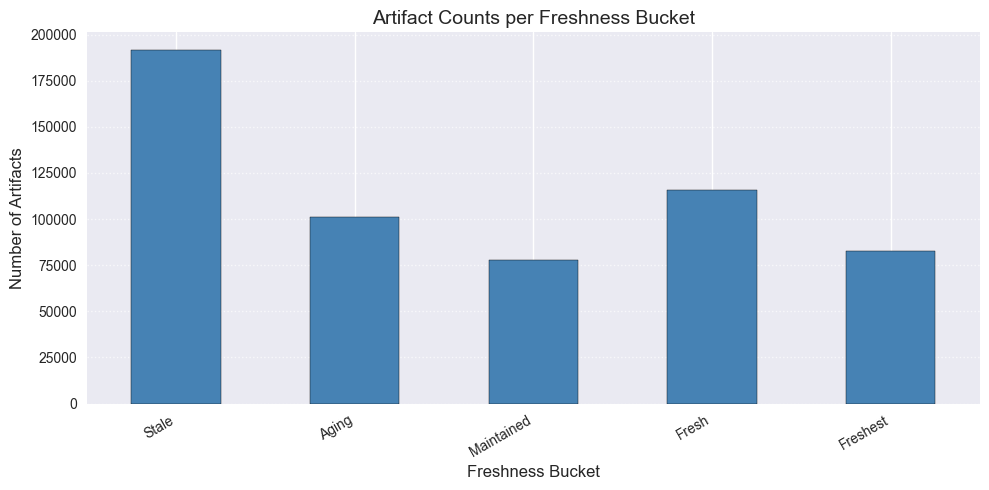

In [5]:
# Calculate Freshness Scores
analyser.calculate_freshness_scores()
analyser.assign_freshness_buckets()

#print and describe freshness scores
analyser.df_artifacts['latest_freshness_score'].describe()
print(analyser.df_artifacts["freshness_bucket"].value_counts(dropna=False))

#plot and display freshness distribution and bucket counts
fig1= analyser.plot_freshness_distribution() 
fig2 =analyser.plot_bucket_counts(
    bucket_col="freshness_bucket",
    title="Artifact Counts per Freshness Bucket",
    bucket_order=["Stale", "Aging", "Maintained", "Fresh", "Freshest"]
)
#fig2= analyser.plot_freshness_bucket_counts()

# Pfeiffer's Work Replication
Replicating Tables I and II from Pfeiffer's analysis of Maven Central dependency network.

In [6]:
# Generate and display Table I
table_i = analyser.create_pfeiffer_table_i(top_n=25, use_raw_pagerank=True)
analyser.display_table("Table I - PACKAGES WITH HIGHEST PR BY ECOSYSTEM.", table_i.reset_index(drop=True))


Name,PR,TF,CS
org.hamcrest:hamcrest-core,21096.252945,2.0,0.54761
junit:junit,13484.216195,3.0,0.65954
com.google.code.findbugs:findbugs-annotations,10061.029758,1.0,0.48540
org.apiguardian:apiguardian-api,7936.271092,1.0,0.48272
org.hamcrest:hamcrest-library,2977.687654,2.0,0.54761
org.jetbrains:annotations,2902.787540,2.0,0.50279
org.easymock:easymock,1157.706365,1.0,0.59767
org.opentest4j:opentest4j,1140.808334,2.0,0.53960
org.hamcrest:hamcrest,1024.570738,2.0,0.54761
org.mockito:mockito-all,721.838195,1.0,0.71460


In [7]:

# Generate and display Table II
tableii = analyser.create_pfeiffer_table_ii(top_n=25)

print("Table II - ABSOLUTE AND RELATIVE NUMBER OF DIRECT AND INDIRECT DEPENDENTS OF PACKAGES (DEPTH TWO AND THREE)")
display(HTML(tableii.reset_index(drop=True).to_html(escape=False)))


# Generate and display Table III - Artifact Dependents from CSV
table_iii = analyser.create_artifact_dependents_table(top_n=45)
print("\nTable III - ABSOLUTE AND RELATIVE NUMBER OF DIRECT AND INDIRECT DEPENDENTS OF ARTIFACTS")
display(HTML(table_iii.reset_index(drop=True).to_html(escape=False)))





Table II - ABSOLUTE AND RELATIVE NUMBER OF DIRECT AND INDIRECT DEPENDENTS OF PACKAGES (DEPTH TWO AND THREE)


,Name,◦→◦,◦−[1..2]→◦,◦−[1..3]→◦
0,junit:junit,"2,765,845 21% (22%)","8,313,972 64% (65%)","10,476,939 81% (82%)"
1,org.hamcrest:hamcrest-all,"700,198 5% (5%)","2,387,606 18% (19%)","4,082,145 31% (32%)"
2,org.apache.felix:org.apache.felix.scr.ds-annotations,"432,194 3% (3%)","552,710 4% (4%)","606,972 5% (5%)"
3,com.google.code.findbugs:jsr305,"426,308 3% (3%)","2,126,748 16% (17%)","5,254,852 40% (41%)"
4,log4j:log4j,"417,879 3% (3%)","3,239,250 25% (25%)","5,879,251 45% (46%)"
5,org.hamcrest:hamcrest-library,"216,501 2% (2%)","1,709,055 13% (13%)","5,204,246 40% (41%)"
6,javax.inject:javax.inject,"145,944 1% (1%)","1,052,304 8% (8%)","3,752,787 29% (29%)"
7,org.easymock:easymock,"141,708 1% (1%)","2,487,619 19% (19%)","6,439,329 50% (50%)"
8,org.hamcrest:hamcrest-core,"134,946 1% (1%)","3,329,799 26% (26%)","8,150,721 63% (64%)"
9,javax.servlet:servlet-api,"129,060 1% (1%)","1,060,757 8% (8%)","4,300,661 33% (34%)"



Table II - ABSOLUTE AND RELATIVE NUMBER OF DIRECT AND INDIRECT DEPENDENTS OF ARTIFACTS


,Artifact,◦→◦,◦−[1..2]→◦,◦−[1..3]→◦
0,junit:junit,"152,059 26.7% (23.1%)","341,644 60.1% (51.9%)","416,137 73.2% (63.2%)"
1,org.hamcrest:hamcrest-core,"6,689 1.2% (1.0%)","156,071 27.4% (23.7%)","326,804 57.5% (49.7%)"
2,org.easymock:easymock,"7,099 1.2% (1.1%)","79,917 14.1% (12.1%)","244,869 43.1% (37.2%)"
3,log4j:log4j,"18,927 3.3% (2.9%)","110,598 19.4% (16.8%)","210,919 37.1% (32.1%)"
4,org.hamcrest:hamcrest-library,"10,567 1.9% (1.6%)","91,761 16.1% (13.9%)","210,516 37.0% (32.0%)"
5,com.google.code.findbugs:jsr305,"17,230 3.0% (2.6%)","94,661 16.6% (14.4%)","205,845 36.2% (31.3%)"
6,javax.servlet:servlet-api,"9,472 1.7% (1.4%)","61,659 10.8% (9.4%)","170,358 30.0% (25.9%)"
7,javax.inject:javax.inject,"6,540 1.2% (1.0%)","49,279 8.7% (7.5%)","150,151 26.4% (22.8%)"
8,org.hamcrest:hamcrest-all,"11,988 2.1% (1.8%)","52,825 9.3% (8.0%)","134,806 23.7% (20.5%)"
9,javax.activation:activation,"2,259 0.4% (0.3%)","22,094 3.9% (3.4%)","122,263 21.5% (18.6%)"


In [8]:
# Compute correlations and compare with Pfeiffer's results
comparison_table = analyser.compute_correlations()

# Separate tables for PR vs CS and TF vs CS
pr_vs_cs_table = comparison_table[comparison_table['Metric Pair'] == 'PR vs CS']
tf_vs_cs_table = comparison_table[comparison_table['Metric Pair'] == 'TF vs CS']

# Display PR vs CS table
analyser.display_table("Comparison of PR vs CS Correlation Results", pr_vs_cs_table)

# Display TF vs CS table
analyser.display_table("Comparison of TF vs CS Correlation Results", tf_vs_cs_table)

Spearman correlations sample size (n): 320


Metric Pair,Source,Spearman Coefficient (ρ),p-value,p,n
PR vs CS,Computed,-0.1109,0.047381,0.047,320
PR vs CS,Pfeiffer,0.0346,0.743600,0.744,92


Metric Pair,Source,Spearman Coefficient (ρ),p-value,p,n
TF vs CS,Computed,0.4792,8.944562e-20,<1e-6,320
TF vs CS,Pfeiffer,0.5416,NaN,<0.05,92


,artifact_count,%_with_CVE,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count,CRITICAL,HIGH,LOW,MODERATE,NONE
pr_bucket,,,,,,,,,,
None,293681,0.08,0.03,0.03,0.01,0.01,0.02,0.00,0.02,99.94
Peripheral,120096,0.18,0.18,0.10,0.12,0.03,0.05,0.01,0.03,99.88
Notable,85861,0.23,0.22,0.09,0.06,0.03,0.06,0.00,0.05,99.86
Core,58937,0.62,0.69,0.25,0.33,0.11,0.13,0.00,0.10,99.65
Important,8627,3.13,5.36,1.25,1.43,0.74,0.73,0.07,0.61,97.84
Elite,1490,7.45,11.54,2.68,1.84,1.88,1.88,0.20,1.68,94.36


,artifact_count,%_with_CVE,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count,CRITICAL,HIGH,LOW,MODERATE,NONE
freshness_bucket,,,,,,,,,,
Stale,191652,0.12,0.03,0.02,0.00,0.02,0.03,0.00,0.04,99.89
Fresh,115873,0.38,0.30,0.19,0.10,0.06,0.09,0.01,0.08,99.76
Aging,100972,0.10,0.06,0.01,0.00,0.02,0.02,0.00,0.02,99.93
Freshest,82475,0.60,1.22,0.31,0.52,0.11,0.12,0.01,0.07,99.69
Maintained,77720,0.16,0.08,0.05,0.01,0.05,0.05,0.00,0.03,99.87


,artifact_count,%_with_CVE,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count,CRITICAL,HIGH,LOW,MODERATE,NONE
tds_bucket,,,,,,,,,,
Moderate,124775,0.22,0.26,0.09,0.09,0.04,0.05,0.01,0.04,99.87
Lightweight,122636,0.15,0.16,0.06,0.03,0.03,0.03,0.00,0.02,99.91
Very Lightweight,121202,0.21,0.28,0.07,0.07,0.05,0.06,0.00,0.05,99.84
Heavy,88988,0.33,0.38,0.16,0.22,0.06,0.06,0.01,0.06,99.81
Bloated / Complex,57154,0.33,0.30,0.18,0.16,0.06,0.10,0.01,0.03,99.80
No Dependencies,53937,0.36,0.32,0.10,0.07,0.06,0.09,0.01,0.14,99.71


,artifact_count,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count
cve_severity_bucket,,,,
NONE,567787,0.04,0.02,0.01
HIGH,326,153.83,48.77,51.23
MODERATE,284,64.77,38.73,30.59
CRITICAL,265,235.09,50.57,88.36
LOW,30,44.37,60.00,22.53


,artifact_count,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count
cve_count_bucket,,,,
None,567304,0.00,0.00,0.00
10+,937,161.22,45.25,59.78
6-10,201,7.94,29.35,2.12
3-5,130,3.92,33.85,1.17
1,66,1.00,25.76,0.26
2,54,2.00,27.78,0.56


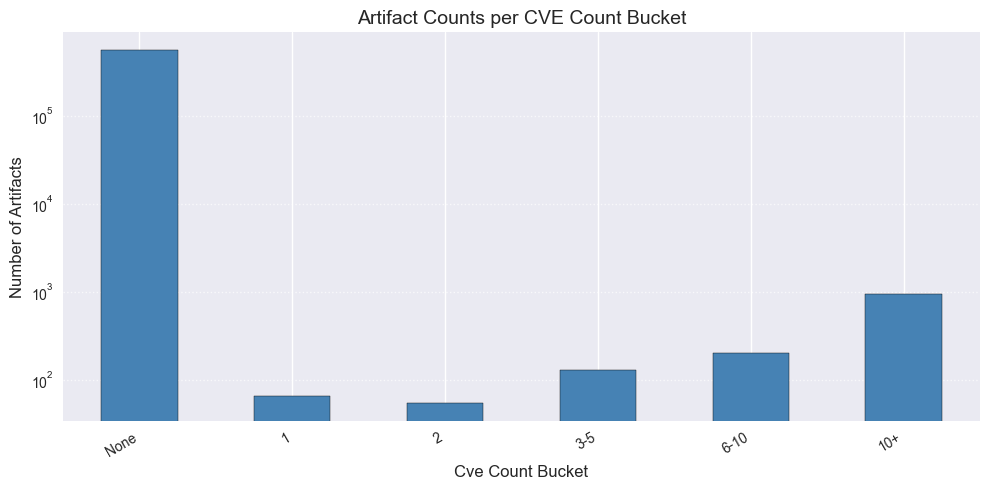

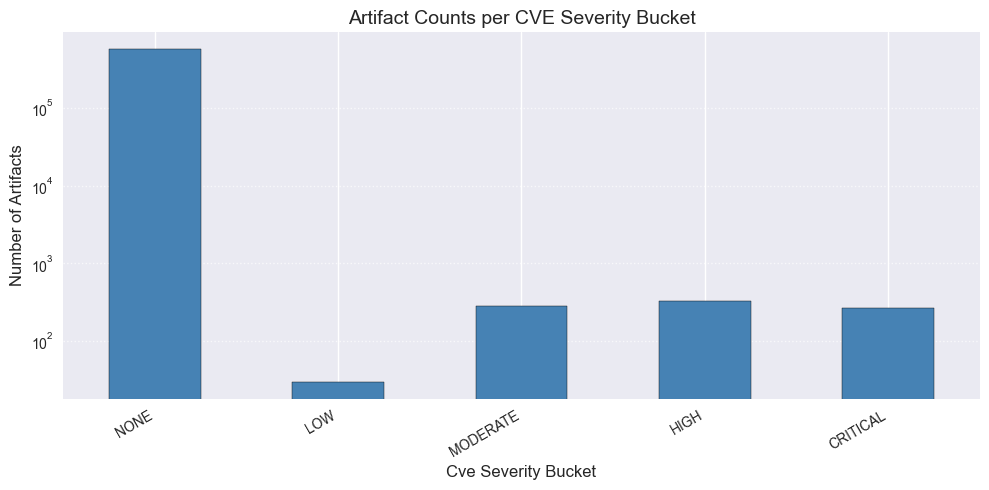

In [9]:
analyser.assign_cve_buckets()
analyser.plot_bucket_counts(
    bucket_col="cve_count_bucket",
    title="Artifact Counts per CVE Count Bucket",
    bucket_order=["None", "1", "2", "3-5", "6-10", "10+"],
    log_scale=True
)
analyser.plot_bucket_counts(
    bucket_col="cve_severity_bucket",
    title="Artifact Counts per CVE Severity Bucket",
    bucket_order=["NONE", "LOW", "MODERATE", "HIGH", "CRITICAL"],
    log_scale=True
)


bucket_stats = analyser.summarise_buckets(as_percent=True)
cve_stats = analyser.summarise_cve_buckets()
# Show PR-bucket summary
display(bucket_stats["pr_bucket"])
display(bucket_stats["freshness_bucket"])
display(bucket_stats["tds_bucket"])
print("\n")
display(cve_stats["cve_severity_bucket"])
display(cve_stats["cve_count_bucket"])


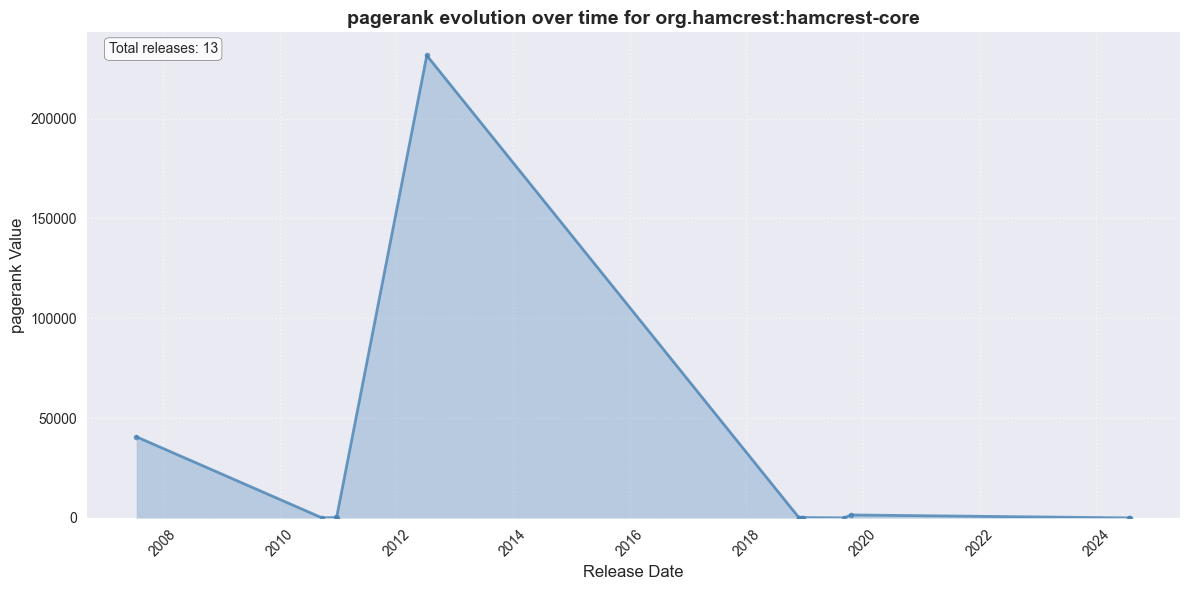

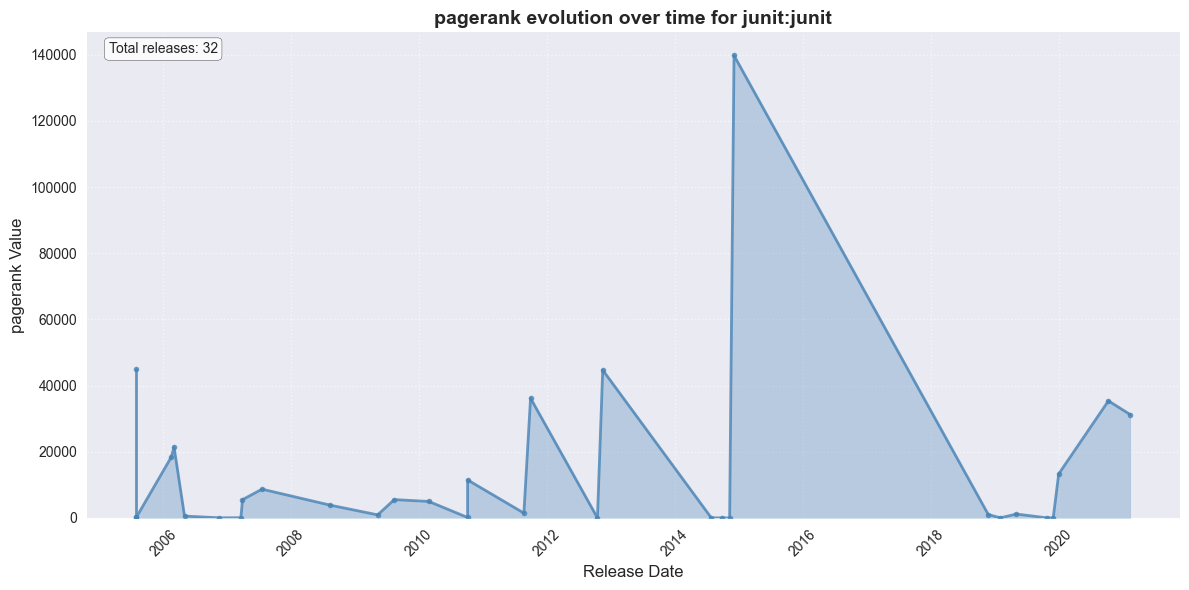

In [10]:



fig2 =analyser.plot_artifact_metric_histogram(
    artifact_id="org.hamcrest:hamcrest-core",
    metric="pagerank",
    bins=100,
    by_year=False,
    max_years=15
)

fig3 =analyser.plot_artifact_metric_histogram(
    artifact_id="junit:junit",
    metric="pagerank",
    bins=100,
    by_year=False,
    max_years=15
)



In [11]:


artifact_info = analyser.df_artifacts[analyser.df_artifacts["artifact_id"] == "com.typesafe:config"][["artifact_id", "mean_pagerank", "criticality_score_pf", "truck_factor"]]
print(artifact_info)

# Get overall mean truck factor for all artifacts
overall_mean_tf = analyser.df_artifacts["truck_factor"].mean()
print(f"\nOverall mean truck factor: {overall_mean_tf:.4f}")

artifact_info = analyser.df_artifacts[analyser.df_artifacts["artifact_id"] == "com.fasterxml.jackson.core:jackson-databind"][["artifact_id", "mean_pagerank", "criticality_score_pf", "truck_factor"]]
print(artifact_info)

# Get total number of releases with 0 mean TDS
zero_tds_count = (analyser.df_artifacts["mean_tds"] == 0).sum()
total_artifacts = len(analyser.df_artifacts)
zero_tds_percentage = (zero_tds_count / total_artifacts) * 100

print(f"Total artifacts with 0 mean TDS: {zero_tds_count:,}")
print(f"Total artifacts: {total_artifacts:,}")
print(f"Percentage with 0 mean TDS: {zero_tds_percentage:.2f}%")

# Get 3 examples of artifacts with 0 mean TDS
zero_tds_artifacts = analyser.df_artifacts[analyser.df_artifacts["mean_tds"] == 0].head(5)[["artifact_id", "mean_tds"]]
print("\n3 examples of artifacts with 0 mean TDS:")
display(zero_tds_artifacts)

# Get 3 examples of artifacts with extreme TDS (highest values)
extreme_tds_artifacts = analyser.df_artifacts.nlargest(5, "mean_tds")[["artifact_id", "mean_tds"]]
print("\n3 examples of artifacts with extreme TDS (highest values):")
display(extreme_tds_artifacts)




             artifact_id  mean_pagerank  criticality_score_pf  truck_factor
306  com.typesafe:config      74.474255                0.5957           1.0

Overall mean truck factor: 2.7219
                                     artifact_id  mean_pagerank  \
165  com.fasterxml.jackson.core:jackson-databind     142.766555   

     criticality_score_pf  truck_factor  
165               0.70631           1.0  
Total artifacts with 0 mean TDS: 53,937
Total artifacts: 568,692
Percentage with 0 mean TDS: 9.48%

3 examples of artifacts with 0 mean TDS:


,artifact_id,mean_tds
2,org.scala-sbt:test-interface,0.0
4,org.apiguardian:apiguardian-api,0.0
5,javax.inject:javax.inject,0.0
6,org.apache.felix:org.apache.felix.scr.ds-annot...,0.0
7,org.hamcrest:hamcrest-all,0.0



3 examples of artifacts with extreme TDS (highest values):


,artifact_id,mean_tds
273952,io.github.shuigedeng:taotao-cloud-starter-web,9351.323529
351329,cn.ibizlab.plugin:ibizlab-boot-starter-engine,7921.000000
499638,love.keeping:cloud-starter,7830.000000
477239,com.ikingtech.platform:business-report,7668.000000
489731,net.guerlab.smart.oauth:smart-oauth-web,7609.000000


In [12]:
# CVE Data Statistics

# Get overall CVE statistics
total_artifacts = len(analyser.df_artifacts)
artifacts_with_cve = analyser.df_artifacts["has_cve"].sum()
artifacts_with_recent_cve = analyser.df_artifacts["has_recent_cve"].sum()

cve_percentage = (artifacts_with_cve / total_artifacts) * 100
recent_cve_percentage = (artifacts_with_recent_cve / total_artifacts) * 100

print("=== Overall CVE Statistics ===")
print(f"Total artifacts: {total_artifacts:,}")
print(f"Artifacts with CVEs: {artifacts_with_cve:,} ({cve_percentage:.2f}%)")
print(f"Artifacts with recent CVEs: {artifacts_with_recent_cve:,} ({recent_cve_percentage:.2f}%)")

# CVE count statistics
print(f"\nMean CVE count per artifact: {analyser.df_artifacts['total_cve_count'].mean():.2f}")
print(f"Mean recent CVE count per artifact: {analyser.df_artifacts['total_recent_cve_count'].mean():.2f}")
print(f"Max CVE count for any artifact: {analyser.df_artifacts['total_cve_count'].max()}")

# CVE severity distribution
print("\n=== CVE Severity Distribution ===")
severity_counts = analyser.df_artifacts["predominant_max_severity"].value_counts()
print(severity_counts)

# Get CVE bucket summaries
cve_bucket_stats = analyser.summarise_cve_buckets()

print("\n=== CVE Count Bucket Statistics ===")
display(cve_bucket_stats["cve_count_bucket"])

print("\n=== CVE Severity Bucket Statistics ===")
display(cve_bucket_stats["cve_severity_bucket"])

# Examples of high-CVE artifacts
print("\n=== Top 10 Artifacts by CVE Count ===")
high_cve_artifacts = analyser.df_artifacts.nlargest(10, "total_cve_count")[["artifact_id", "total_cve_count", "total_recent_cve_count", "predominant_max_severity"]]
display(high_cve_artifacts)









=== Overall CVE Statistics ===
Total artifacts: 568,692
Artifacts with CVEs: 1,388 (0.24%)
Artifacts with recent CVEs: 559 (0.10%)

Mean CVE count per artifact: 0.27
Mean recent CVE count per artifact: 0.10
Max CVE count for any artifact: 6375

=== CVE Severity Distribution ===
predominant_max_severity
NONE        567787
HIGH           326
MODERATE       284
CRITICAL       265
LOW             30
Name: count, dtype: int64

=== CVE Count Bucket Statistics ===


,artifact_count,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count
cve_count_bucket,,,,
None,567304,0.00,0.00,0.00
10+,937,161.22,45.25,59.78
6-10,201,7.94,29.35,2.12
3-5,130,3.92,33.85,1.17
1,66,1.00,25.76,0.26
2,54,2.00,27.78,0.56



=== CVE Severity Bucket Statistics ===


,artifact_count,avg_CVE_count,%_with_recent_CVE,avg_recent_CVE_count
cve_severity_bucket,,,,
NONE,567787,0.04,0.02,0.01
HIGH,326,153.83,48.77,51.23
MODERATE,284,64.77,38.73,30.59
CRITICAL,265,235.09,50.57,88.36
LOW,30,44.37,60.00,22.53



=== Top 10 Artifacts by CVE Count ===


,artifact_id,total_cve_count,total_recent_cve_count,predominant_max_severity
165,com.fasterxml.jackson.core:jackson-databind,6375,0,CRITICAL
107848,com.liferay.portal:com.liferay.portal.impl,6010,0,HIGH
9033,org.elasticsearch:elasticsearch,5056,0,HIGH
4980,org.apache.tomcat.embed:tomcat-embed-core,4382,0,CRITICAL
26604,org.keycloak:keycloak-services,3740,2298,NONE
1966,org.eclipse.jetty:jetty-server,2565,187,CRITICAL
185187,org.wso2.carbon.identity.framework:org.wso2.ca...,2377,2377,MODERATE
5724,org.keycloak:keycloak-core,2234,239,NONE
8235,org.apache.struts:struts2-core,2186,440,CRITICAL
53815,org.wso2.identity.apps:authentication-portal,2026,2026,HIGH


In [13]:
archetype_groups = analyser.create_archetype_groups_table()
display(archetype_groups)

archetype_previews = analyser.preview_archetype_groups()

,Cluster,Definition (PR × Freshness × TDS),n,% of artefacts
0,Foundational,Elite × Freshest × (None ∪ Very-Lightweight),99,0.017%
1,Mainstream,Important × (Fresh ∪ Freshest) × Moderate,536,0.094%
2,Complex,(Elite ∪ Important) × (Stale ∪ Aging ∪ Maintai...,90,0.016%



 Foundational Cluster - Top 10 artifacts (sorted by mean_pagerank)
   Total artifacts in cluster: 99


,artifact_id,mean_pagerank,mean_tds,pr_bucket,tds_bucket,freshness_bucket
0,org.hamcrest:hamcrest-core,21096.252945,0.615385,Elite,Very Lightweight,Freshest
1,org.hamcrest:hamcrest-library,2977.687654,1.571429,Elite,Very Lightweight,Freshest
2,org.easymock:easymock,1157.706365,2.607143,Elite,Very Lightweight,Freshest
3,org.hamcrest:hamcrest,1024.570738,0.000000,Elite,No Dependencies,Freshest
4,org.apache.commons:commons-lang3,801.378018,0.000000,Elite,No Dependencies,Freshest
5,org.slf4j:slf4j-api,677.640369,0.009524,Elite,Very Lightweight,Freshest
6,org.scala-lang:scala-library,588.797055,0.015000,Elite,Very Lightweight,Freshest
7,org.jetbrains.kotlin:kotlin-stdlib-common,571.004713,0.382979,Elite,Very Lightweight,Freshest
8,commons-codec:commons-codec,467.309282,0.050000,Elite,Very Lightweight,Freshest
9,org.junit.jupiter:junit-jupiter-api,395.864017,2.873239,Elite,Very Lightweight,Freshest



 Mainstream Cluster - Top 10 artifacts (sorted by mean_pagerank)
   Total artifacts in cluster: 536


,artifact_id,mean_pagerank,mean_tds,pr_bucket,tds_bucket,freshness_bucket
0,org.scalatest:scalatest_sjs1_3,9.859410,24.933333,Important,Moderate,Fresh
1,com.amazonaws:aws-java-sdk-test-utils,9.658373,43.017048,Important,Moderate,Freshest
2,org.scalatest:scalatest-funsuite_3,9.643144,83.333333,Important,Moderate,Fresh
3,org.apache.kerby:kerb-simplekdc,9.527558,35.272727,Important,Moderate,Freshest
4,org.typelevel:cats-core_native0.4_3,9.430138,20.250000,Important,Moderate,Fresh
5,org.wso2.orbit.org.apache.tomcat:tomcat,9.390632,21.727273,Important,Moderate,Fresh
6,org.springframework:spring-aop,9.105172,84.297398,Important,Moderate,Freshest
7,org.scalatest:scalatest-flatspec_3,9.101116,83.333333,Important,Moderate,Fresh
8,org.bytedeco:javacpp,8.980261,47.057143,Important,Moderate,Fresh
9,org.scalatest:scalatest-shouldmatchers_3,8.978613,84.333333,Important,Moderate,Fresh



 Complex Cluster - Top 10 artifacts (sorted by mean_pagerank)
   Total artifacts in cluster: 90


,artifact_id,mean_pagerank,mean_tds,pr_bucket,tds_bucket,freshness_bucket
0,io.github.open-accelerators:mercury-common,36.175626,626.000000,Elite,Bloated / Complex,Maintained
1,org.apereo:spring-webflow-client-repo,26.306493,642.000000,Elite,Bloated / Complex,Stale
2,org.apache.hadoop:hadoop-ozone-filesystem-common,6.084694,674.500000,Important,Bloated / Complex,Aging
3,org.springframework.webflow:spring-webflow,5.004231,518.041667,Important,Bloated / Complex,Maintained
4,com.github.houbb:test-spring,4.195193,982.000000,Important,Bloated / Complex,Aging
5,org.apache.camel:camel-core-starter,3.910870,2984.540000,Important,Bloated / Complex,Aging
6,cloud.altemista.fwk.framework:cloud-altemistaf...,3.707282,949.333333,Important,Bloated / Complex,Aging
7,org.apache.hadoop:hadoop-ozone-common,3.315631,633.400000,Important,Bloated / Complex,Aging
8,org.wso2.carbon.automation:org.wso2.carbon.aut...,3.295635,693.750000,Important,Bloated / Complex,Aging
9,org.apache.camel:camel-spring-boot-starter,3.257353,2983.758621,Important,Bloated / Complex,Aging


In [14]:
fr_stats = analyser.df_artifacts["latest_freshness_score"].describe()
print("\nFreshness Distribution Summary:")
print(fr_stats)

print("\n=== Freshness Bucket Distribution ===")
freshness_bucket_counts = analyser.df_artifacts["freshness_bucket"].value_counts()
print(freshness_bucket_counts)


Freshness Distribution Summary:
count    568692.000000
mean          0.477291
std           0.357304
min           0.000437
25%           0.121479
50%           0.423141
75%           0.862767
max           0.998968
Name: latest_freshness_score, dtype: float64

=== Freshness Bucket Distribution ===
freshness_bucket
Stale         191652
Fresh         115873
Aging         100972
Freshest       82475
Maintained     77720
Name: count, dtype: int64


In [15]:
# Count artifacts with 0 mean TDS
zero_tds_count = (analyser.df_artifacts["mean_tds"] == 0.0).sum()
total_artifacts = len(analyser.df_artifacts)
zero_tds_percentage = (zero_tds_count / total_artifacts) * 100

print(f"Artifacts with 0 mean TDS: {zero_tds_count:,} ({zero_tds_percentage:.2f}%)")
print(f"Total artifacts: {total_artifacts:,}")



Artifacts with 0 mean TDS: 53,937 (9.48%)
Total artifacts: 568,692
